In [ ]:
import cv2
import os
from PIL import Image
import numpy as np

image_directory='/content/drive/MyDrive/BrainTumor'
no_tumor_images=os.listdir(image_directory+'/no')
yes_tumor_images=os.listdir(image_directory+'/yes')
# val_tumor_images=os.listdir(image_directory+'/pred')

dataset=[]
label=[]
val=[]

INPUT_SIZE=64

for i, image_name in enumerate(no_tumor_images):
  if(image_name.split('.')[1]=='jpg'):
    image=cv2.imread(image_directory+'/no/'+image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((INPUT_SIZE,INPUT_SIZE)) 
    dataset.append(np.array(image))
    label.append(0)


for i, image_name in enumerate(yes_tumor_images):
  if(image_name.split('.')[1]=='jpg'):
    image=cv2.imread(image_directory+'/yes/'+image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((INPUT_SIZE,INPUT_SIZE)) 
    dataset.append(np.array(image))
    label.append(1)


In [ ]:
print(len(dataset))
print(len(label))

In [ ]:
from sklearn.model_selection import train_test_split

dataset=np.array(dataset) 
label=np.array(label)
x_train, x_test, y_train, y_test=train_test_split(dataset, label,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2400, 64, 64, 3)
(2400,)
(600, 64, 64, 3)
(600,)


# Data Normalization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import normalize

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.models import Sequential
INPUT_SIZE=64
x_train=normalize(x_train, axis=1) 
x_test=normalize( x_test, axis=1)


model=Sequential()
model.add(Conv2D (32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3))) 
model.add(Activation ('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D (32, (3,3), kernel_initializer='he_uniform')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D (64, (3,3), kernel_initializer='he_uniform')) 
model.add(Activation ('relu'))
model.add(MaxPooling2D (pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
# Binary Cross Entropy= 1, sigmoid
# Categorical Cross Entryopy= 2, softmax
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train,batch_size=16,verbose=1, epochs=10,validation_data=(x_test,y_test),shuffle=False)
model.save('BrainTumor10Epochs.h5')

Epoch 1/10
150/150 [==============================] - 18s 107ms/step - loss: 0.5637 - accuracy: 0.7088 - val_loss: 0.4517 - val_accuracy: 0.7800
Epoch 2/10
150/150 [==============================] - 16s 106ms/step - loss: 0.4347 - accuracy: 0.8154 - val_loss: 0.3742 - val_accuracy: 0.8333
Epoch 3/10
150/150 [==============================] - 16s 108ms/step - loss: 0.3447 - accuracy: 0.8558 - val_loss: 0.2718 - val_accuracy: 0.8783
Epoch 4/10
150/150 [==============================] - 16s 106ms/step - loss: 0.2539 - accuracy: 0.9029 - val_loss: 0.2500 - val_accuracy: 0.8967
Epoch 5/10
150/150 [==============================] - 16s 106ms/step - loss: 0.2018 - accuracy: 0.9317 - val_loss: 0.1800 - val_accuracy: 0.9283
Epoch 6/10
150/150 [==============================] - 16s 106ms/step - loss: 0.1350 - accuracy: 0.9563 - val_loss: 0.1836 - val_accuracy: 0.9333
Epoch 7/10
150/150 [==============================] - 16s 107ms/step - loss: 0.1118 - accuracy: 0.9600 - val_loss: 0.1634 - val_ac

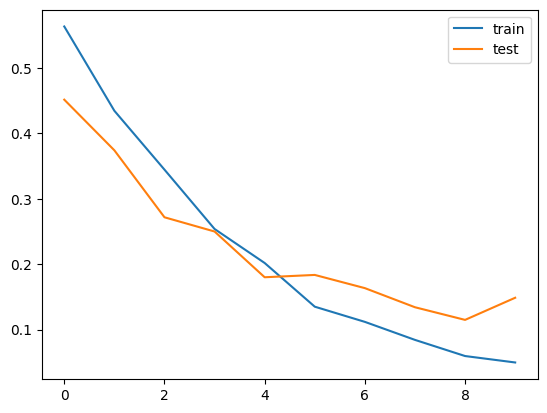

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="test")
plt.legend()
plt.show()

# Model Testing

In [ ]:
from keras.models import load_model
# model=load_model('Brain Tumor10Epochs.h4')

modelf =load_model('/content/drive/MyDrive/BrainTumor/BrainTumor10Epochs.h5')
image=cv2.imread('/content/drive/MyDrive/BrainTumor/pred/pred0.jpg')
img=Image.fromarray(image)
img=img.resize((64,64))
img=np.array(img)
input_img=np.expand_dims(img, axis=0)
x=np.argmax(modelf.predict(input_img), axis=1)
if x==1:
  print("It has brain Tumor")
else :
  print("It does not have brain Tumor")


1/1 [==============================] - 0s 296ms/step
It does not have brain Tumor
